## Overview of the parser output: Universal Dependencies for Finnish

**Universal Dependencies (UD)**
  * Open community effort to create cross-linguistically consistent treebank annotation for many languages
  * Main effort in dependency-based syntax annotation
  * Guidelines for:
    * Segmentation
    * Morphology
    * Lemmatization
    * Syntax
    
**Data in UD** (as of version 2.8 release from May 2021)
 * 202 treebanks
 * 114 languages
 * 24 language families
 * 450+ contributors
 * 4 treebanks for Finnish (3 from Turku, 1 from Helsinki, this notebook refers to the Turku data)
 * https://universaldependencies.org/

**Motivation of UD**
  * Increasing interest in multilingual NLP
    * Studies involving several languages
    * Multilingual evaluation
    * Cross-lingual learning - learn from English data, adapt the knowledge for Finnish data
  * All these studies rely on annotated data
    * Traditionally annotation schemes differ between corpora annotated for the same task

**Design principles of UD**
  * needs to have a solid linguistic foundation
  * be transparent and accessible to non-specialists
  * support well downstream language understanding tasks
  
**Disclamer**
  * Despite of the common guidelines, adaptation can vary between different treebanks
    * Language-specific additions
    * Language-specific omissions
    * Treebank level annotation practices
  
  
References:

*Joakim Nivre, Marie-Catherine de Marneffe, Filip Ginter, Yoav Goldberg, Jan Hajič, Christopher D. Manning, Ryan McDonald, Slav Petrov, Sampo Pyysalo, Natalia Silveira, Reut Tsarfaty, Daniel Zeman. Universal Dependencies v1: A Multilingual Treebank Collection. In Proceedings of LREC. 2016.*

*Marie-Catherine de Marneffe, Christopher D. Manning, Joakim Nivre, Daniel Zeman. Universal Dependencies. Computational Linguistics. 2021.*

*universaldependencies.org*

## Segmentation

* Tokenization and sentence splitting
* Straightforward whitespace splitting taking care of punctuation
  * Restricted class of tokens allowed to include whitespace inside a token
    * numeric expressions "20 000", emoticons ": )", abbreviations "e. g."
    * multiword expressions (e.g. "in spite of") not allowed to annotate as single tokens
  * splitting of orthographic tokens corresponding to multiple (syntactic) words (multiword token)
    * ettei --> että ei
    * ellei --> jos ei
    * special notion in CoNLL-U to represent these

https://universaldependencies.org/u/overview/tokenization.html

## Morphological annotation

* **Universal part-of-speech annotation**
   * 17 values (15 used in the Finnish parser)
   * Each token must have exactly one universal part-of-speech tag
   * https://universaldependencies.org/u/pos/index.html
   
* **Language-specific part-of-speech annotation**
   * Different set of tags for each treebank
   * Currently not produced by the parser
   
* **Morphological feature annotation**
   * A list of morphological features
   * Every word can have any number of features
   * Each feature is a category–value pair (e.g. Case=Nom or Number=Sing)
   * May vary between languages
   * Finnish has 80+ unique features
   * https://universaldependencies.org/u/feat/index.html


## Lemmatization

* Canonical or base form of the word, the one typically found in dictionaries
* Inflectional vs. derivational morphology
   * lemma annotation should not normalize derivational morphology
   * "opettaja" not lemmatized as "opettaa"
   * "nopeasti" not lemmatized as "nopea"
* The Finnish parser also detects compound boundaries ("tutkimushenkilöitä" --> "tutkimus#henkilö")

## Dependency syntax

* typed dependency relations between words
* basic dependency representation forms a tree
  * exactly one word is the head of the sentence
  * all other words are dependent on another word in the sentence
* dependency relations primarily between content words
  * function words attach as direct dependents of the most closely related content word
  * content words as heads maximizes parallelism between languages because content words vary less than function words between languages
  * punctuation attaches to the head of the clause or phrase to which they belong
* 37 universal relations + language-specific subtypes
* https://universaldependencies.org/u/dep/index.html

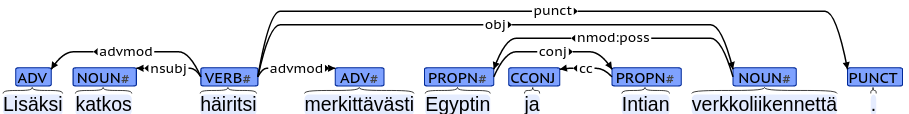

## CoNLL-U file format

* Terminology reminder: format != schema
   * File format tells how the file is structured (syntax), while annotation schema describes the meaning of the annotation


* CoNLL-U format is based on lines and columns

* sentence/document metadata: lines starting with "#"
* empty line: sentence boundary
* each numbered line is a separate token, columns are different annotations for the token
* Underscore is used for empty fields (no annotation required or missing annotation)
* columns: ID, FORM, LEMMA, UPOS, XPOS, FEAT, HEAD, DEPREL, DEPS, MISC
  * ID: word index
  * FORM: original word form as appeared in the text
  * LEMMA: base form
  * UPOS: universal part-of-speech tag (17 values)
  * XPOS: language-specific part-of-speech tag (different in each corpus)
  * FEAT: list of morphological features
  * HEAD: governor in the dependency tree (id), or zero (root token)
  * DEPREL: dependency relation type
  * DEPS: Enhanced dependency graph
  * MISC: Any other annotation, especially original spacing

```
# sent_id = wn096.9
# text = Lisäksi katkos häiritsi merkittävästi Egyptin ja Intian verkkoliikennettä.
1  Lisäksi           lisäksi          ADV    Adv    _                       3 advmod    _    _
2  katkos            katkos           NOUN   N      Case=Nom|Number=Sing    3 nsubj     _    _
3  häiritsi          häiritä          VERB   V      Mood=Ind|Number=Sing... 0 root      _    _
4  merkittävästi     merkittävästi    ADV    Adv    Derivation=Sti          3 advmod    _     _
5  Egyptin           Egypti           PROPN  N      Case=Gen|Number=Sing    8 nmod:poss _    _
6  ja                ja               CCONJ  C      _                       7 cc        _    _
7  Intian            Intia            PROPN  N      Case=Gen|Number=Sing    5 conj	    _    _
8  verkkoliikennettä verkko#liikenne  NOUN   N      Case=Par|Number=Sing    3 obj       _    SpaceAfter=No
9  .                 .                PUNCT  Punct  _                       3 punct     _    _

# sent_id = b112.2
# text = Sain sähköpostia.
1  Sain              saada            VERB   V      Mood=Ind|Number=Sing... 0 root      _    _
2  sähköpostia       sähkö#posti      NOUN   N	    Case=Par|Number=Sing    1 obj       _    SpaceAfter=No
3  .                 .                PUNCT  Punct  _                       1 punct     _    _ 

```

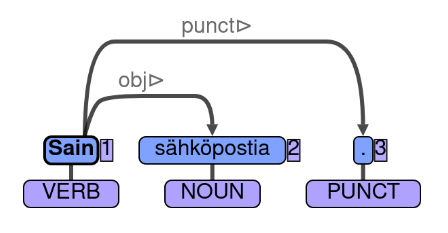

## Quality of the parser output

* Machine learned parser will ALWAYS give an output, if it does not know the word, it will guess based on the word itself and the surrounding sentence.

* Quality of the predictions can be measured if correct analyses are known

* Evaluation results for the Finnish model trained on UD_Finnish-TDT training set, evaluated on UD_Finnish-TDT test set:



```
Metric     | Precision |    Recall |  F1 Score | AligndAcc
-----------+-----------+-----------+-----------+-----------
Tokens     |     99.72 |     99.66 |     99.69 |
Sentences  |     88.18 |     84.89 |     86.50 |
Words      |     99.72 |     99.64 |     99.68 |
UPOS       |     97.84 |     97.77 |     97.80 |     98.12
XPOS       |      0.00 |      0.00 |      0.00 |      0.00
UFeats     |     96.46 |     96.39 |     96.42 |     96.73
AllTags    |      0.00 |      0.00 |      0.00 |      0.00
Lemmas     |     96.17 |     96.10 |     96.13 |     96.44
UAS        |     92.93 |     92.87 |     92.90 |     93.20
LAS        |     91.27 |     91.21 |     91.24 |     91.53
CLAS       |     90.64 |     90.45 |     90.55 |     90.75
MLAS       |     85.63 |     85.44 |     85.53 |     85.73
BLEX       |     86.51 |     86.32 |     86.42 |     86.61
```

How to read the table:

* *How often the parser predicts the universal part-of-speech tag correctly?* – F1 for UPOS is 97.80, so ~98 tokens out of 100 tokens are correctly predicted.
* *How often the parser predicts the syntactic tree correctly?* – LAS is 91.24, so ~91 tokens out of 100 tokens have correctly predicted parent token (HEAD) and relation type (DEPREL).



What affects the prediction quality?

* In-domain vs. out-of-domain data
* Common vs. rare words
* Errors often cluster